In [147]:
# Dependencies
# ----------------------------------
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [148]:
# Dependencies
# ----------------------------------
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [149]:
# Python SQL toolkit and Object Relational Mapper
# import sqlalchemy
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String, Float
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [150]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [151]:
# View all of the classes that automap found

# Declare a Base using 'automap_base()'
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [152]:
# Save references to each table

# Assign the 'measurement' to a variable called 'Measurement'
measurement = Base.classes.measurement
station = Base.classes.station

In [153]:
# Create our session (link) from Python to the DB

# Create a session
session = Session(engine)

In [154]:
# Display the class 'measurement' columns and data in first rows in dictionary format
session.query(measurement).first().__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x14457d23948>,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'prcp': 2.0,
 'id': 0,
 'tobs': 18.3}

In [155]:
# Display the class 'station' columns and data in first rows in dictionary format
session.query(station).first().__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x14457f99b88>,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'id': 0,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'elevation': 0.914}

In [156]:
inspect(engine).get_table_names()

['measurement', 'station']

In [157]:
# engine.execute('DROP TABLE hawaii_measurements')
# engine.execute('DROP TABLE hawaii_station')
# engine.execute('DROP TABLE Measurements')

In [158]:
# reflect an existing database into a new model
hawaii_measurement = engine.execute('SELECT * FROM measurement').keys()
# reflect the tables
for record in hawaii_measurement:
    print(record)

id
station
date
prcp
tobs


In [159]:
conn = engine.connect()
hawaii_measurement = pd.read_sql('SELECT * FROM measurement', conn)
print (hawaii_measurement)

          id      station        date  prcp  tobs
0          0  USC00519397  2010-01-01   2.0  18.3
1          1  USC00519397  2010-01-02   0.0  17.2
2          2  USC00519397  2010-01-03   0.0  23.3
3          3  USC00519397  2010-01-04   0.0  24.4
4          4  USC00519397  2010-01-06   NaN  22.8
...      ...          ...         ...   ...   ...
19545  19545  USC00516128  2017-08-19   2.3  21.7
19546  19546  USC00516128  2017-08-20   NaN  25.6
19547  19547  USC00516128  2017-08-21  14.2  24.4
19548  19548  USC00516128  2017-08-22  12.7  24.4
19549  19549  USC00516128  2017-08-23  11.4  24.4

[19550 rows x 5 columns]


In [160]:
# reflect an existing database into a new model
hawaii_station = engine.execute('SELECT * FROM station')
# reflect the tables
for record in hawaii_station:
    print(record)

(0, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 0.914)
(1, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 4.45)
(2, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 2.133)
(3, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 3.627)
(4, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 93.447)
(5, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 5.943)
(6, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84889, 10.027)
(7, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.274)
(8, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 46.449)


In [161]:
conn = engine.connect()
hawaii_station = pd.read_sql('SELECT * FROM station', conn)
hawaii_station.head(5)

,id,station,name,latitude,longitude,elevation
0,0,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,0.914
1,1,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,4.450
2,2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,2.133
3,3,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,3.627
4,4,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,93.447


# Exploratory Precipitation Analysis

In [162]:
# Find the most recent date in the data set.
conn = engine.connect()
most_recent_date = pd.read_sql('SELECT * FROM measurement ORDER BY date DESC LIMIT 1', conn)
print(f'The most recent date in the data set is {most_recent_date.date}')

The most recent date in the data set is 0    2017-08-23
Name: date, dtype: object


In [163]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.

# Starting from the most recent data point in the database. And Select only the "date" and "prcp" values.
date_prcp_df = pd.read_sql("SELECT date, prcp FROM measurement WHERE date <= '2017-08-23' AND date >= '2016-08-23'", conn)

In [164]:
# Load the query results into a Pandas DataFrame, and set the index to the "date" column.
print(date_prcp_df)
date_prcp_df.set_index('date')

            date  prcp
0     2016-08-23   0.0
1     2016-08-24   2.0
2     2016-08-25   2.0
3     2016-08-26   0.0
4     2016-08-27   0.0
...          ...   ...
2225  2017-08-19   2.3
2226  2017-08-20   NaN
2227  2017-08-21  14.2
2228  2017-08-22  12.7
2229  2017-08-23  11.4

[2230 rows x 2 columns]


,prcp
date,
2016-08-23,0.0
2016-08-24,2.0
2016-08-25,2.0
2016-08-26,0.0
2016-08-27,0.0
...,...
2017-08-19,2.3
2017-08-20,NaN
2017-08-21,14.2


In [165]:
# Sort the DataFrame values by "date".
df = date_prcp_df.set_index('date').sort_index(ascending=True)
df_max = date_prcp_df.groupby(by='date').max()
df_max

,prcp
date,
2016-08-23,45.5
2016-08-24,57.9
2016-08-25,5.3
2016-08-26,1.0
2016-08-27,4.6
...,...
2017-08-19,2.3
2017-08-20,0.3
2017-08-21,14.2


TypeError: 'str' object is not callable

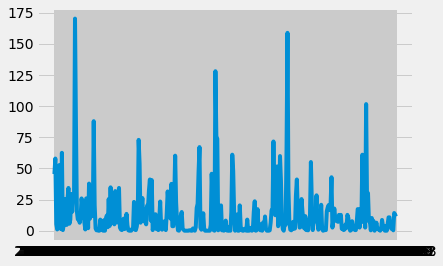

In [169]:
xpoints = df_max.index
ypoints = df_max['prcp']

plt.plot(xpoints, ypoints)
plt.xlabel('Date')
plt.ylabel('mm')
plt.title('precipitation in 08/2016-08/2017')
plt.show()

In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data

# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM
df_mean = df.groupby(by=["date"])["prcp"].mean()
df_median = df.groupby(by=["date"])["prcp"].median()
df_var = df.groupby(by=["date"])["prcp"].var()
df_std = df.groupby(by=["date"])["prcp"].std()
df_sem = df.groupby(by=["date"])["prcp"].sem()
df_sum = df.groupby(by=['date']).sum()

In [ ]:
# Assemble the resulting series into a single summary dataframe.
summary_df = {}
summary_df = pd.DataFrame({
    "mean": df_mean,
    "median": df_median,
    "var": df_var,
    "std": df_std,
    "sem": df_sem
})
summary_df

,mean,median,var,std,sem
date,,,,,
2016-08-23,11.483333,2.55,322.453667,17.956995,7.330912
2016-08-24,39.483333,45.70,456.073667,21.355881,8.718502
2016-08-25,1.942857,2.00,3.292857,1.814623,0.685863
2016-08-26,0.433333,0.40,0.170667,0.413118,0.168655
2016-08-27,1.620000,0.50,4.322000,2.078942,0.929731
...,...,...,...,...,...
2017-08-19,0.766667,0.00,1.763333,1.327906,0.766667
2017-08-20,0.150000,0.15,0.045000,0.212132,0.150000
2017-08-21,4.900000,0.50,64.930000,8.057915,4.652240


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset
total_Stations= session.query(measurement.station).group_by('station').count()
print(f'The total number stations are {total_Stations}')

The total number stations are 9


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_count = pd.read_sql("SELECT * FROM measurement", conn)

In [ ]:
station_count_1 = station_count.groupby(by='station').count()
station_activate = station_count_1.sort_values(by=['prcp'],ascending=False).head(1)
print(f'The most activate station is {station_activate.index}')

The most activate station is Index(['USC00519281'], dtype='object', name='station')


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
min_tobs = session.query(func.min(measurement.tobs), measurement).filter(measurement.station == 'USC00519281').all()
max_tobs = session.query(func.max(measurement.tobs), measurement).filter(measurement.station == 'USC00519281').all()
avg_tobs = session.query(func.avg(measurement.tobs), measurement).filter(measurement.station == 'USC00519281').all()

print(f'The most active station id is USC00519281.')
print(f'Its lowest temperature is {min_tobs}.')
print(f'Its highest temperature is {max_tobs}.')
print(f'Its average temperature is {avg_tobs}.')

The most active station id is USC00519281.
Its lowest temperature is [(12.2, <sqlalchemy.ext.automap.measurement object at 0x0000014455786C08>)].
Its highest temperature is [(29.4, <sqlalchemy.ext.automap.measurement object at 0x0000014455786D48>)].
Its average temperature is [(22.03582251082252, <sqlalchemy.ext.automap.measurement object at 0x0000014455771588>)].


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
date_tobs_df = pd.read_sql("SELECT date, tobs FROM measurement WHERE date <= '2017-08-23' AND date >= '2016-08-23'", conn)
date_tobs_df

,date,tobs
0,2016-08-23,27.2
1,2016-08-24,26.1
2,2016-08-25,26.7
3,2016-08-26,26.1
4,2016-08-27,25.0
...,...,...
2225,2017-08-19,21.7
2226,2017-08-20,25.6
2227,2017-08-21,24.4
2228,2017-08-22,24.4


TypeError: 'str' object is not callable

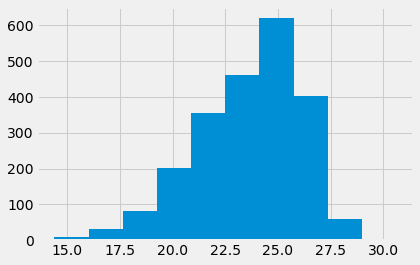

In [ ]:
x = np.array(date_tobs_df.tobs)
plt.hist(x)

plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend('tobs')

plt.show()

# Close session

In [ ]:
# Close Session
session.close()